# Code Discussion 4
Rosey Cao

## Instructions
For this coding discussion, let’s play around with some of the linear algebra concepts that we’ve covered in class. Specifically, let’s return to our discussion of representing text as vectors and analyzing the angle between those vectors (which as we saw, offers a measure of similarity).

In the Data/ folder, there are five separate news reports on Turkish President Erdogan addressing the murder of journalist Jamal Khashoggi in .txt files. Each contains the same story (relatively speaking) from different sources with different political leanings/interests. In addition to this, I also include stop-words.csv file containing common English words that we want to purge from our text (recall there are words that are common to all sentences, like “the” and “and”, that we want to remove when comparing documents).

Use what we know about (a) reading in text files, (b) data manipulation, and (c) linear algebra to analyze the difference between these documents. Does each news site report on these stories in a similar way? Which news sites talk about the Khashoggi scandal in similar/dissimilar ways? If you change what words you remove, does the picture of similarity change?

This discussion is largely open. Probe the data however you see fit. The only restriction is that you must calculate the cosine similarity on your own. Don’t rely on any canned functions that do this for you.

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Manipulation

In [2]:
## Change working directory to Data
%cd '/Users/Rose_cth/Documents/Georgetown/FL20/PPOL564/CD_Rosey/CD4/04_coding_discussion/Data'

/Users/Rose_cth/Documents/Georgetown/FL20/PPOL564/CD_Rosey/CD4/04_coding_discussion/Data


In [3]:
## Read in multiple articles in text files
filenames = ['aljazeera-khashoggi.txt', 'bbc-khashoggi.txt', 'breitbart-khashoggi.txt','cnn-khashoggi.txt','fox-khashoggi.txt']
texts =[open(f, 'r').read() for f in filenames]

## Read in the csv file containing stop_words, convert it to a list
stopwords = pd.read_csv('stop_words.csv').word.to_list()

In [4]:
## Tokenize imported articles

def tokenize(text=None):
    ''' 
    Tokenize an article. Lower case, remove punctuations and stop words.

    Args:
        text(in a string): An article needs to be tokenized

    Returns:
        words in text(in a list): A list of words in the article after tokenization
    '''
    
    #Lower case
    text = text.lower().replace("’","'").replace("'s"," is").replace("'ve"," have").replace("n't"," not")
    
    # Remove punctuations
    punc = '''!()[]{};"'“”\,<>./?@#%^&*_~'''
    hyphan = "-—"
    
    for ele in text:  
        if ele in punc:  
            text = text.replace(ele,'')
        elif ele in hyphan:
            text = text.replace(ele,' ')
        else:
            continue
    
    # Split the text and remove the stop words
    text_list = text.split()
    text_list2 = [word for word in text_list if word not in stopwords]
    
    return text_list2

In [5]:
## Count the words
def convert_text_to_dtm(txt):
    '''
    Converts text into a document term matrix.
    
    Args:
        txt: An article that needs a word count
    
    Returns
        DataFrame: Word counts in a data frame
    '''
    d = dict()
    for word in tokenize(txt):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [6]:
# Build a function to generate a document term matrix
def gen_DTM(texts=None):
    '''
    Generate a document term matrix.
    
    Args:
        texts: A list of articles(each in a long string)
    
    Returns
        DataFrame: Word counts in a data frame for each article
    
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = convert_text_to_dtm(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM

In [7]:
## Display the wordcounts
DTM = gen_DTM(texts)
DTM

,$50bn,1,11,12,15,18,1:08,2,28,2r,...,white,widely,withheld,woods,world,worse,writer,yalova,yelova,£385bn
0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0


In [8]:
## Check the words survived the my cleaning
list(DTM.columns)

['$50bn',
 '1',
 '11',
 '12',
 '15',
 '18',
 '1:08',
 '2',
 '28',
 '2r',
 '4:30',
 '55',
 '59',
 '90',
 '9:50',
 'abdulaziz',
 'absent',
 'accident',
 'accidentally',
 'accidentallyerdogan',
 'account',
 'accounts',
 'accusation',
 'accusing',
 'acknowledged',
 'added',
 'adding',
 'addition',
 'address',
 'addressing',
 'adel',
 'admitted',
 'admitting',
 'advance',
 'agency',
 'ago',
 'aides',
 'ak',
 'akp',
 'al',
 'alerted',
 'alibi',
 'alive',
 'allegation',
 'allegedly',
 'allowed',
 'ally',
 'amounted',
 'ankara',
 'ankaraamong',
 'announced',
 'anonymous',
 'answered',
 'answering',
 'answers',
 'anticipated',
 'appeared',
 'appearing',
 'applause',
 'approbation',
 'arabia',
 'arabian',
 'arabic',
 'arguing',
 'arrested',
 'arrests',
 'arrival',
 'arrived',
 'arrives',
 'assassination',
 'attempt',
 'attempts',
 'attendees',
 'attributed',
 'audience',
 'audio',
 'authenticity',
 'authorities',
 'authority',
 'avoided',
 'aware',
 'bbc',
 'beard',
 'belgrad',
 'belgrave',
 'bi

##### Question
> How to clean different tense? Such as "watching/watch", "urged/urgency" are talking about the same thing

## Linear Algebra

In [9]:
## Define a cosine function:
def cosine(a,b):
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))
    return cos

In [10]:
## Calculate the cosine similarity, save the result to a data frame
# Create a empty data frame to store the result
num = len(texts)
news_cos_sim = pd.DataFrame(index=np.arange(num), columns = np.arange(num))
for i in range(0,num):
    for j in range(0,num):
        news_cos_sim.iloc[i,j]= cosine(DTM.iloc[i].values, DTM.iloc[j].values).round(3)

In [11]:
## Rename and cleaning
name_dict = {0:'aljazeera', 1:'bbc', 2:'breitbart', 3:'cnn', 4:'fox'}
news_cos_sim.rename(columns= name_dict, index = name_dict, inplace = True)
news_cos_sim = news_cos_sim.astype('float')
news_cos_sim

,aljazeera,bbc,breitbart,cnn,fox
aljazeera,1.000,0.704,0.601,0.587,0.718
bbc,0.704,1.000,0.622,0.553,0.692
breitbart,0.601,0.622,1.000,0.418,0.581
cnn,0.587,0.553,0.418,1.000,0.593
fox,0.718,0.692,0.581,0.593,1.000


## Discussion
The heatmap will be a good way to visualize the results. It suggest that CNN and Breitbart talk about the news most differently. It's reasonable as they are on the two ends of the media ideology spectrum.

Taking the 3Blue1Brown mindset, If we translate the cosine value to the angle between the two vectors, the result is shown below in a new data frame.(The smaller the angle, the two vectors lay the closer.) Although when we look at the cosine similarity itself, the value seems to be very close to each other, the angle is actually not that small because cosine is on a scale of (0,1). (How different is 0.42 and 0.7? It's the difference between a 45 degree angle and a 60 degree angle!)

If we keep all the stop words, our discussion is completely off way. See results in the last graph. News will be much more similar to each other.

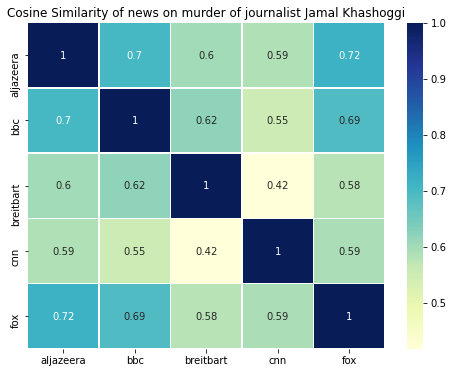

In [12]:
## Visualise result using heatmap
plt.figure(figsize = (8,6))
plt.title('Cosine Similarity of news on murder of journalist Jamal Khashoggi')
sns.heatmap(news_cos_sim, cmap="YlGnBu",annot=True,linewidths=.5)
plt.show()

In [13]:
## Getting theta
angle = np.arccos(news_cos_sim)/ math.pi *180
angle = angle.round(2).astype('float')
angle

,aljazeera,bbc,breitbart,cnn,fox
aljazeera,0.00,45.25,53.06,54.06,44.11
bbc,45.25,0.00,51.54,56.43,46.21
breitbart,53.06,51.54,0.00,65.29,54.48
cnn,54.06,56.43,65.29,0.00,53.63
fox,44.11,46.21,54.48,53.63,0.00


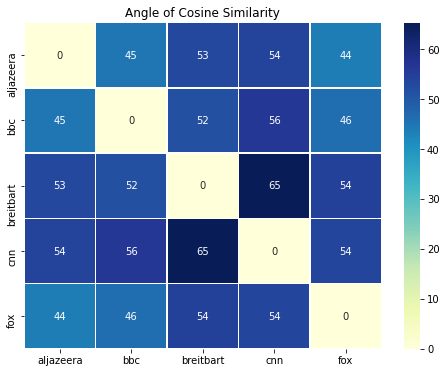

In [14]:
## Visualize theta
plt.figure(figsize = (8,6))
plt.title('Angle of Cosine Similarity')
sns.heatmap(angle, cmap="YlGnBu",annot=True,linewidths=.5)
plt.show()

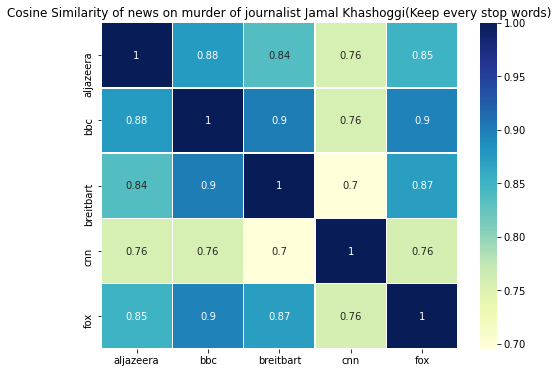

In [15]:
## Keep every stop word, recheck the result
stopwords = []
DTM2 = gen_DTM(texts)

news_cos_sim2 = pd.DataFrame(index=np.arange(num), columns = np.arange(num))
for i in range(0,num):
    for j in range(0,num):
        news_cos_sim2.iloc[i,j]= cosine(DTM2.iloc[i].values, DTM2.iloc[j].values)

name_dict = {0:'aljazeera', 1:'bbc', 2:'breitbart', 3:'cnn', 4:'fox'}
news_cos_sim2.rename(columns= name_dict, index = name_dict, inplace = True)
news_cos_sim2 = news_cos_sim2.astype('float')
news_cos_sim2

plt.figure(figsize = (8,6))
plt.title('Cosine Similarity of news on murder of journalist Jamal Khashoggi(Keep every stop words)')
sns.heatmap(news_cos_sim2, cmap="YlGnBu",annot=True,linewidths=.5)
plt.show()